<a href="https://colab.research.google.com/github/relmarrakchy/phishing-URL-detection/blob/master/phishing_detection_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv("/content/drive/MyDrive/datasets/malicious_phish1.csv")

dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [21]:
dataset["type"].value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [22]:
benigns = dataset[dataset["type"] == "benign"].iloc[:120876, :]
phishings = dataset[dataset["type"] == "phishing"]

In [25]:
dataset = pd.concat([benigns, phishings])
dataset = dataset.sample(frac=1).reset_index(drop=True)

dataset["type"].value_counts()

benign      120876
phishing     94111
Name: type, dtype: int64

In [46]:
from urllib.parse import urlparse
import string
import re

def host_length(url):
    parsed_url = urlparse(url)
    return len(parsed_url.netloc)

def count_slashes(url):
    return url.count('/')

def count_dots_in_host(url):
    parsed_url = urlparse(url)
    host_name = parsed_url.netloc
    return host_name.count('.')

def count_host_terms(url):
    parsed_url = urlparse(url)
    host_name = parsed_url.netloc
    return len(host_name.split('.'))

def has_special_characters(url):
    special_characters = set(string.punctuation.replace('/', '').replace('.', '').replace("-", ""))
    for char in url:
        if char in special_characters:
            return 1
    return 0

def has_ip_address(url):
    ip_pattern = r"\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b|\b(?:[0-9a-fA-F]{1,4}:){7}[0-9a-fA-F]{1,4}\b"
    return int(bool(re.search(ip_pattern, url)))

def has_unicode(url):
    for char in url:
        if ord(char) > 127:
            return 1
    return 0

def has_http(url):
    return int("http" in url)

def has_subdomain(url):
    parsed_url = urlparse(url)
    if parsed_url.hostname:
        parts = parsed_url.hostname.split('.')
        return int(len(parts) > 2)
    return 0

def tld_exists(url):
    parsed_url = urlparse(url)
    if parsed_url.hostname:
        parts = parsed_url.hostname.split('.')
        if len(parts) > 1:
            tld = parts[-1]
            recognized_tlds = {'com', 'net', 'org', 'edu', 'gov'}
            return int(tld.lower() in recognized_tlds)
    return 0

def count_dots_in_path(url):
    parsed_url = urlparse(url)
    path = parsed_url.path
    return path.count('.')

def count_hyphens_in_host(url):
    parsed_url = urlparse(url)
    host = parsed_url.hostname
    if host:
        return host.count('-')
    else:
        return 0

def url_length(url):
    return len(url)

def target(t):
  if t == "benign":
    return 0
  else:
    return 1

dataset["host length"] = dataset["url"].apply(host_length)
dataset["numb of slashes"] = dataset["url"].apply(count_slashes)
dataset["numb of host terms"] = dataset["url"].apply(count_host_terms)
dataset["has specialChar"] = dataset["url"].apply(has_special_characters)
dataset["numb of dots host"] = dataset["url"].apply(count_dots_in_host)
dataset["has unicode"] = dataset["url"].apply(has_unicode)
dataset["has http"] = dataset["url"].apply(has_http)
dataset["has subdomain"] = dataset["url"].apply(has_subdomain)
dataset["TLD valid"] = dataset["url"].apply(tld_exists)
dataset["numb of dots path"] = dataset["url"].apply(count_dots_in_path)
dataset["numb of hyphens in host"] = dataset["url"].apply(count_hyphens_in_host)
dataset["URL length"] = dataset["url"].apply(url_length)
dataset["target"] = dataset["type"].apply(target)

dataset.head()

,url,type,host length,numb of slashes,numb of dots,numb of host terms,has specialChar,has IpAddr,has unicode,has http,has subdomain,TLD valid,numb of dots path,numb of dots host,numb of hyphens,numb of hyphens in host,URL length,target
0,yellowpages.com/payette-id,benign,0,1,0,1,0,0,0,0,0,0,1,0,0,0,26,0
1,plasticsareforever.org,phishing,0,0,0,1,0,0,0,0,0,0,1,0,0,0,22,1
2,news.cnet.com/2100-1023-241065.html,phishing,0,1,0,1,0,0,0,0,0,0,3,0,0,0,35,1
3,www.edhelper.com/wordfind.htm,phishing,0,1,0,1,0,0,0,0,0,0,3,0,0,0,29,1
4,youtube.com/watch?v=vOFJb_7xjfU,benign,0,1,0,1,1,0,0,0,0,0,1,0,0,0,31,0


In [47]:
dataset.drop(columns=["url", "type"], inplace=True)

dataset.head()

,host length,numb of slashes,numb of dots,numb of host terms,has specialChar,has IpAddr,has unicode,has http,has subdomain,TLD valid,numb of dots path,numb of dots host,numb of hyphens,numb of hyphens in host,URL length,target
0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,26,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,22,1
2,0,1,0,1,0,0,0,0,0,0,3,0,0,0,35,1
3,0,1,0,1,0,0,0,0,0,0,3,0,0,0,29,1
4,0,1,0,1,1,0,0,0,0,0,1,0,0,0,31,0


In [48]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report)

In [49]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
model = Sequential([
    Dense(125, activation='relu', input_shape=(15,)),
    Dense(35, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 125)               2000      
                                                                 
 dense_1 (Dense)             (None, 35)                4410      
                                                                 
 dense_2 (Dense)             (None, 12)                432       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 6855 (26.78 KB)
Trainable params: 6855 (26.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5375/5375 [==============================] - 15s 3ms/step - loss: 0.3523 - accuracy: 0.8566
Epoch 2/15
5375/5375 [==============================] - 12s 2ms/step - loss: 0.2669 - accuracy: 0.8930
Epoch 3/15
5375/5375 [==============================] - 11s 2ms/step - loss: 0.2586 - accuracy: 0.8955
Epoch 4/15
5375/5375 [==============================] - 12s 2ms/step - loss: 0.2547 - accuracy: 0.8968
Epoch 5/15
5375/5375 [==============================] - 12s 2ms/step - loss: 0.2526 - accuracy: 0.8976
Epoch 6/15
5375/5375 [==============================] - 12s 2ms/step - loss: 0.2512 - accuracy: 0.8978
Epoch 7/15
5375/5375 [==============================] - 12s 2ms/step - loss: 0.2503 - accuracy: 0.8981
Epoch 8/15
5375/5375 [==============================] - 12s 2ms/step - loss: 0.2496 - accuracy: 0.8983
Epoch 9/15
5375/5375 [==============================] - 11s 2ms/step - loss: 0.2489 - accuracy: 0.8986
Epoch 10/15
5375/5375 [==============================] - 12s 2ms/step - loss: 0.2483

In [52]:
loss, accuracy = model.evaluate(X_test, y_test)
accuracy

1344/1344 [==============================] - 4s 2ms/step - loss: 0.2493 - accuracy: 0.8984


0.8983673453330994

1344/1344 [==============================] - 6s 5ms/step


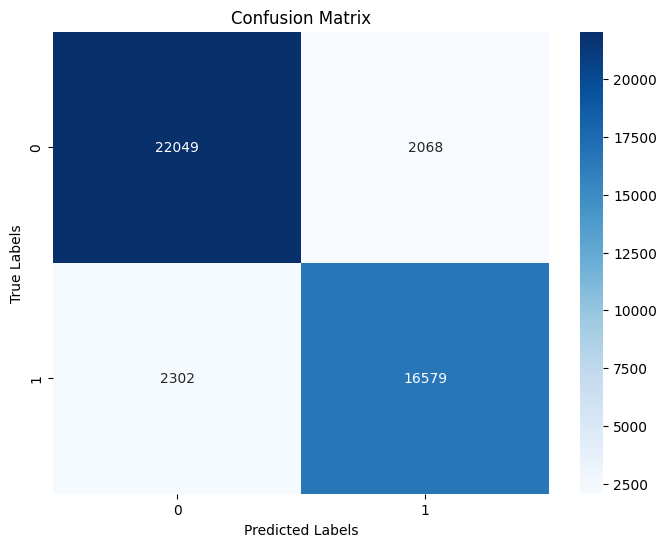

In [53]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     24117
           1       0.89      0.88      0.88     18881

    accuracy                           0.90     42998
   macro avg       0.90      0.90      0.90     42998
weighted avg       0.90      0.90      0.90     42998

